In [115]:
# import libraries and packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc, accuracy_score, confusion_matrix, roc_auc_score, classification_report, f1_score

# Remove display restrictions
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None) 

In [9]:
fpl_df = pd.read_csv('cleaned_merged_seasons.csv')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [27]:
# Filter the DataFrame to include only records with 'influence' 1.0 or above
filteredFPL_df = fpl_df.loc[fpl_df['influence'] >= 1.0]

In [34]:
estimate = filteredFPL_df.loc[filteredFPL_df['influence'] >= 25.0].shape[0]
print(f"Number of players with influence 59.0 or above: {estimate}")

Number of players with influence 59.0 or above: 8836


In [35]:
display(fpl_df.head(5))

,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,10,0,0,0.0,0.0,2016-08-15T19:00:00Z,0,4,Chelsea,0,0,0,0,1,0,14023,1.0,2.0,0.0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,3,0,0,0.9,8.2,2016-08-13T14:00:00Z,15,17,Spurs,0,0,0,0,1,0,13918,1.0,1.0,0.0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,8,3,0,3.0,2.2,2016-08-14T15:00:00Z,60,9,Liverpool,0,0,0,0,1,0,163170,4.0,3.0,23.0,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,7,0,0,0.0,0.0,2016-08-13T14:00:00Z,0,13,Southampton,0,0,0,0,1,0,1051,1.0,1.0,0.0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,6,1,0,0.3,2.0,2016-08-13T14:00:00Z,69,14,Stoke,0,0,0,0,1,0,2723,1.0,1.0,0.0,1,0,0,0,45,True,1,1


In [28]:
# check dimensions of dataset: rows, columns
filteredFPL_df.shape

(38561, 37)

In [36]:
# add new column to determine influence
filteredFPL_df['high_influence'] = (filteredFPL_df['influence'] >= 25.0).astype(int)
display(filteredFPL_df.head(5)) 

/var/folders/wm/z1f6_f9d3zb9gt8g3wkr4cl00000gn/T/ipykernel_66642/1359576264.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filteredFPL_df['high_influence'] = (filteredFPL_df['influence'] >= 25.0).astype(int)


,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW,high_influence
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,3,0,0,0.9,8.2,2016-08-13T14:00:00Z,15,17,Spurs,0,0,0,0,1,0,13918,1.0,1.0,0.0,1,0,0,0,60,True,0,1,0
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,8,3,0,3.0,2.2,2016-08-14T15:00:00Z,60,9,Liverpool,0,0,0,0,1,0,163170,4.0,3.0,23.0,2,0,0,0,80,True,0,1,0
4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,6,1,0,0.3,2.0,2016-08-13T14:00:00Z,69,14,Stoke,0,0,0,0,1,0,2723,1.0,1.0,0.0,1,0,0,0,45,True,1,1,0
5,2016-17,Adam Lallana,MID,NaN,1,2,33,0,33.7,205,8,3,1,14.2,51.2,2016-08-14T15:00:00Z,75,1,Arsenal,0,0,0,0,1,0,155525,4.0,3.0,57.0,11,0,0,0,70,False,1,1,1
6,2016-17,Adam Smith,DEF,NaN,0,0,23,0,4.3,34,9,3,1,7.4,42.4,2016-08-14T12:30:00Z,90,11,Man Utd,0,0,0,0,1,0,21505,3.0,1.0,27.0,7,0,0,0,45,True,0,1,1


In [37]:
# check the percentage of nulls present in each column
num_null = filteredFPL_df.isnull().sum() / filteredFPL_df.shape[0] * 100
num_null.round(2)

season_x              0.00
name                  0.00
position              0.00
team_x               27.52
assists               0.00
bonus                 0.00
bps                   0.00
clean_sheets          0.00
creativity            0.00
element               0.00
fixture               0.00
goals_conceded        0.00
goals_scored          0.00
ict_index             0.00
influence             0.00
kickoff_time          0.00
minutes               0.00
opponent_team         0.00
opp_team_name         0.00
own_goals             0.00
penalties_missed      0.00
penalties_saved       0.00
red_cards             0.00
round                 0.00
saves                 0.00
selected              0.00
team_a_score          0.00
team_h_score          0.00
threat                0.00
total_points          0.00
transfers_balance     0.00
transfers_in          0.00
transfers_out         0.00
value                 0.00
was_home              0.00
yellow_cards          0.00
GW                    0.00
h

In [38]:
# check data types for each column
filteredFPL_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38561 entries, 1 to 95387
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season_x           38561 non-null  object 
 1   name               38561 non-null  object 
 2   position           38561 non-null  object 
 3   team_x             27950 non-null  object 
 4   assists            38561 non-null  int64  
 5   bonus              38561 non-null  int64  
 6   bps                38561 non-null  int64  
 7   clean_sheets       38561 non-null  int64  
 8   creativity         38561 non-null  float64
 9   element            38561 non-null  int64  
 10  fixture            38561 non-null  int64  
 11  goals_conceded     38561 non-null  int64  
 12  goals_scored       38561 non-null  int64  
 13  ict_index          38561 non-null  float64
 14  influence          38561 non-null  float64
 15  kickoff_time       38561 non-null  object 
 16  minutes            385

In [39]:
# subset numerical columns from categorical
num_cols = pd.DataFrame(filteredFPL_df[filteredFPL_df.select_dtypes(include = ['float', 'int']).columns])

In [40]:
num_cols.head()

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,GW,high_influence
1,0,0,6,0,0.3,142,3,0,0,0.9,8.2,15,17,0,0,0,0,1,0,13918,1.0,1.0,0.0,1,0,0,0,60,0,1,0
2,0,0,5,0,4.9,16,8,3,0,3.0,2.2,60,9,0,0,0,0,1,0,163170,4.0,3.0,23.0,2,0,0,0,80,0,1,0
4,0,0,3,0,1.3,286,6,1,0,0.3,2.0,69,14,0,0,0,0,1,0,2723,1.0,1.0,0.0,1,0,0,0,45,1,1,0
5,1,2,33,0,33.7,205,8,3,1,14.2,51.2,75,1,0,0,0,0,1,0,155525,4.0,3.0,57.0,11,0,0,0,70,1,1,1
6,0,0,23,0,4.3,34,9,3,1,7.4,42.4,90,11,0,0,0,0,1,0,21505,3.0,1.0,27.0,7,0,0,0,45,0,1,1


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

IndexError: GridSpec slice would result in no space allocated for subplot

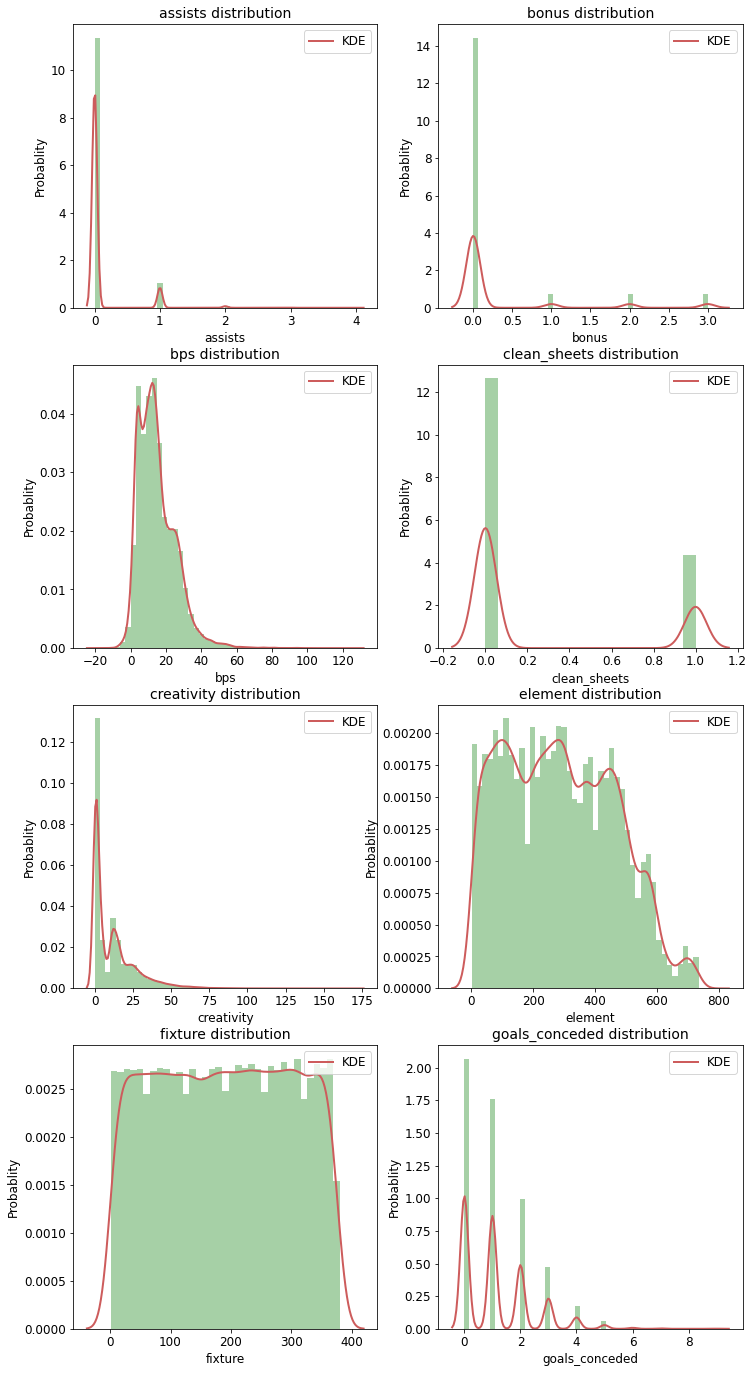

In [41]:
num_cols_hist = num_cols.drop(['influence'], axis=1)
# visualize the distribution for each varieble
plt.figure(figsize=(12,24))

# visualize distributions of numerical columns
for i, col in enumerate(num_cols_hist.columns):
    idx = int('42'+ str(i+1))
    plt.subplot(idx)
    sns.distplot(num_cols_hist[col], color='forestgreen', 
                 kde_kws={'color': 'indianred', 'lw': 2, 'label': 'KDE'})
    plt.title(col+' distribution', fontsize=14)
    plt.ylabel('Probablity', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['KDE'], prop={"size":12});

In [42]:
filteredFPL_df.describe().T

,count,mean,std,min,25%,50%,75%,max
assists,38561.0,0.098882,0.325919,0.0,0.0,0.0,0.0,4.0
bonus,38561.0,0.267006,0.743801,0.0,0.0,0.0,0.0,3.0
bps,38561.0,14.699904,10.558184,-21.0,7.0,13.0,21.0,128.0
clean_sheets,38561.0,0.255932,0.436390,0.0,0.0,0.0,1.0,1.0
creativity,38561.0,11.512450,14.321394,0.0,0.8,5.3,16.8,170.9
element,38561.0,286.896268,174.889396,1.0,134.0,278.0,426.0,770.0
fixture,38561.0,188.784342,108.448273,1.0,95.0,189.0,283.0,380.0
goals_conceded,38561.0,1.137548,1.208013,0.0,0.0,1.0,2.0,9.0
goals_scored,38561.0,0.111252,0.355117,0.0,0.0,0.0,0.0,4.0
ict_index,38561.0,4.185125,3.553183,0.1,1.8,3.1,5.6,32.8


In [43]:
# summary descriptive statistics for players with high influence
filteredFPL_df[filteredFPL_df['high_influence'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
assists,8836.0,0.277275,0.517348,0.0,0.00,0.0,0.00,4.0
bonus,8836.0,0.972499,1.187480,0.0,0.00,0.0,2.00,3.0
bps,8836.0,26.792893,10.850984,-8.0,19.00,26.0,32.00,128.0
clean_sheets,8836.0,0.303305,0.459712,0.0,0.00,0.0,1.00,1.0
creativity,8836.0,16.078282,18.497805,0.0,0.70,11.2,25.60,170.9
element,8836.0,274.748302,169.414601,1.0,130.00,262.0,404.25,733.0
fixture,8836.0,190.559756,109.095636,1.0,96.00,191.0,286.00,380.0
goals_conceded,8836.0,1.180625,1.194295,0.0,0.00,1.0,2.00,9.0
goals_scored,8836.0,0.485174,0.607169,0.0,0.00,0.0,1.00,4.0
ict_index,8836.0,7.914667,4.337904,2.5,4.40,7.1,10.40,32.8


In [44]:
# summary descriptive statistics for players with low influence
filteredFPL_df[filteredFPL_df['high_influence'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
assists,29725.0,0.045854,0.214413,0.0,0.0,0.0,0.0,3.0
bonus,29725.0,0.057292,0.326541,0.0,0.0,0.0,0.0,3.0
bps,29725.0,11.105164,7.295241,-21.0,5.0,10.0,15.0,44.0
clean_sheets,29725.0,0.241850,0.428211,0.0,0.0,0.0,0.0,1.0
creativity,29725.0,10.155220,12.503164,0.0,0.8,4.4,15.3,123.9
element,29725.0,290.507351,176.325568,1.0,136.0,282.0,432.0,770.0
fixture,29725.0,188.256585,108.251321,1.0,94.0,189.0,282.0,380.0
goals_conceded,29725.0,1.124743,1.211786,0.0,0.0,1.0,2.0,9.0
goals_scored,29725.0,0.000101,0.010046,0.0,0.0,0.0,0.0,1.0
ict_index,29725.0,3.076488,2.328306,0.1,1.4,2.4,4.1,20.1


In [45]:
# check dimensions of dataset: rows, columns
filteredFPL_df.shape

(38561, 38)

In [98]:
# clean the dataset and drop outliers
cleaned_filteredFPL_df = filteredFPL_df[filteredFPL_df['selected']<=700000]
cleaned_filteredFPL_df = cleaned_filteredFPL_df[cleaned_filteredFPL_df['transfers_balance']<=50000]
cleaned_filteredFPL_df = cleaned_filteredFPL_df[cleaned_filteredFPL_df['transfers_balance']>=-30000]
cleaned_filteredFPL_df = cleaned_filteredFPL_df[cleaned_filteredFPL_df['transfers_in']<=100000]
cleaned_filteredFPL_df = cleaned_filteredFPL_df[cleaned_filteredFPL_df['transfers_out']<=100000]

In [99]:
# check dimensions of dataset: rows, columns
cleaned_filteredFPL_df.shape

(30237, 38)

In [100]:
# summary descriptive statistics for players with high influence
cleaned_filteredFPL_df[cleaned_filteredFPL_df['high_influence'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
assists,6212.0,0.251932,0.489583,0.0,0.00,0.00,0.00,4.0
bonus,6212.0,0.882486,1.152110,0.0,0.00,0.00,2.00,3.0
bps,6212.0,25.581616,9.902386,-8.0,19.00,25.00,30.00,128.0
clean_sheets,6212.0,0.283162,0.450571,0.0,0.00,0.00,1.00,1.0
creativity,6212.0,14.117321,17.101596,0.0,0.50,10.30,22.40,170.9
element,6212.0,282.970058,176.152746,1.0,128.00,272.00,425.00,733.0
fixture,6212.0,192.444623,108.986085,1.0,100.00,193.00,289.00,380.0
goals_conceded,6212.0,1.219092,1.208355,0.0,0.00,1.00,2.00,9.0
goals_scored,6212.0,0.423535,0.562712,0.0,0.00,0.00,1.00,4.0
ict_index,6212.0,7.200547,3.824567,2.5,4.20,6.45,9.20,31.5


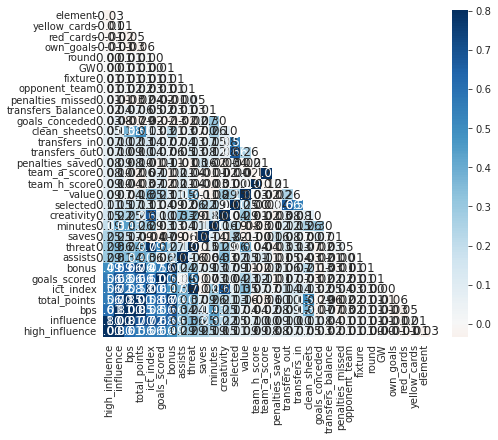

In [101]:
# corrleation matrix for cleaned numerical variables
# different datasets to leave loan_status as numeric to visualize correlation on heatmap, but after this, loan_status should be categorical
cleaned_num_cols_matrix = pd.DataFrame(cleaned_filteredFPL_df[cleaned_filteredFPL_df.select_dtypes(include=['float', 'int']).columns])
cleaned_num_cols = pd.DataFrame(cleaned_filteredFPL_df[cleaned_filteredFPL_df.select_dtypes(include=['float', 'int']).columns]).drop('high_influence', axis = 1)

corr = cleaned_num_cols_matrix.corr().sort_values('high_influence', axis=1, ascending=False)
corr = corr.sort_values('high_influence', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 6))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.high_influence.min(), 
                     vmax=corr.drop(['high_influence'], axis=0).high_influence.max(),
                     square=True, annot=True, fmt='.2f',
                     center=0, cmap='RdBu',annot_kws={"size": 12})

In [102]:
# Scale numeric variables
sc = StandardScaler()
cleaned_num_cols_scaled = pd.DataFrame(sc.fit_transform(cleaned_num_cols), columns = cleaned_num_cols.columns)

In [103]:
# get the categorical variables 
    # only getting this categorical variable since all other ones are useless
cat_cols = pd.DataFrame(cleaned_filteredFPL_df[['position']])
cat_cols.columns

Index(['position'], dtype='object')

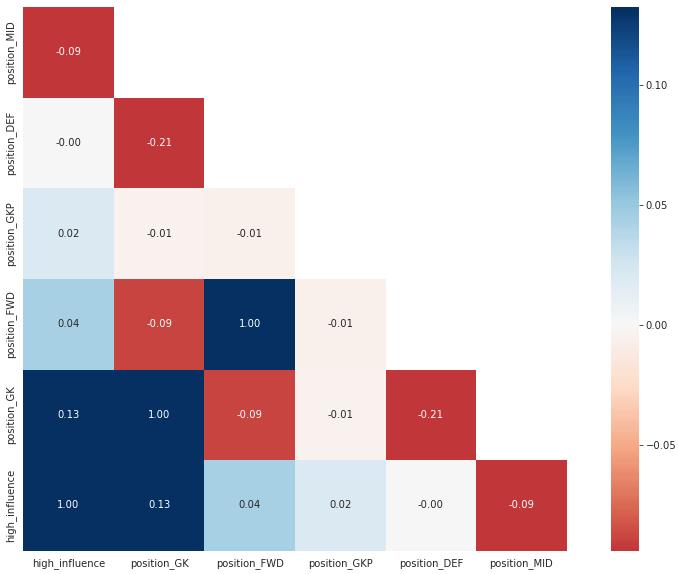

In [104]:
# one hot encode the categorical variables
encoded_cat_cols = pd.get_dummies(cat_cols)
cat_cols_corr = pd.concat([encoded_cat_cols, cleaned_filteredFPL_df['high_influence']], axis=1)
corr = cat_cols_corr.corr().sort_values('high_influence', axis=1, ascending=False)
corr = corr.sort_values('high_influence', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.high_influence.min(), 
                     vmax=corr.drop(['high_influence'], axis=0).high_influence.max(), 
                     square=True, annot=True, fmt='.2f',
                     center=0, cmap='RdBu',annot_kws={"size": 10})

In [106]:
# concat the numerical and one hot encoded variables
# resex index for both numerical scaled and encoded categorical so additional rows are not introduced after concatenation
cleaned_num_cols_scaled.reset_index(drop=True, inplace=True)
encoded_cat_cols.reset_index(drop=True, inplace=True)

cleaned_filteredFPL_df_new = pd.concat([cleaned_num_cols_scaled, encoded_cat_cols], axis = 1)

In [107]:
# check the cleaned dataset size 
print ('The cleaned dataset has {} rows and {} columns'.format(cleaned_filteredFPL_df_new.shape[0], 
                                                               cleaned_filteredFPL_df_new.shape[1]))
print ('The cleaned dataset has {} numerical features and {} categorical features'
       .format(len(cleaned_num_cols.columns)-1, len(encoded_cat_cols.columns)))

The cleaned dataset has 30237 rows and 35 columns
The cleaned dataset has 29 numerical features and 5 categorical features


In [110]:
cleaned_filteredFPL_df_new.head(5)

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,minutes,opponent_team,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,yellow_cards,GW,position_DEF,position_FWD,position_GK,position_GKP,position_MID
0,-0.280759,-0.328247,-0.808858,-0.560123,-0.766573,-0.850873,-1.737097,-0.943076,-0.283450,-0.917414,-0.620405,-2.226781,1.123428,-0.057903,-0.036848,-0.040288,-0.047125,-1.738004,-0.230409,-0.724415,-0.202839,-0.384880,-0.657954,-0.686789,-0.102112,-0.612386,-0.699087,0.747357,-0.370289,-1.738004,0,0,0,0,1
1,-0.280759,-0.328247,-0.911113,-0.560123,-0.415407,-1.554412,-1.690877,1.523474,-0.283450,-0.243131,-1.054617,-0.531722,-0.265709,-0.057903,-0.036848,-0.040288,-0.047125,-1.738004,-0.230409,0.244388,2.238742,1.105498,0.795809,-0.339750,-0.102112,-0.612386,-0.699087,2.687336,-0.370289,-1.738004,0,0,0,0,1
2,-0.280759,-0.328247,-1.115623,-0.560123,-0.690232,-0.046828,-1.709365,-0.120893,-0.283450,-1.110066,-1.069090,-0.192710,0.602502,-0.057903,-0.036848,-0.040288,-0.047125,-1.738004,-0.230409,-0.797083,-0.202839,-0.384880,-0.657954,-0.686789,-0.102112,-0.612386,-0.699087,-0.707627,2.700592,-1.738004,0,0,0,0,1
3,3.094711,2.610374,1.952026,-0.560123,1.783195,-0.499103,-1.690877,1.523474,2.971645,3.353046,2.491445,0.033298,-1.654847,-0.057903,-0.036848,-0.040288,-0.047125,-1.738004,-0.230409,0.194763,2.238742,1.105498,2.944849,2.783595,-0.102112,-0.612386,-0.699087,1.717347,2.700592,-1.738004,0,0,0,0,1
4,-0.280759,-0.328247,0.929476,-0.560123,-0.461211,-1.453907,-1.681633,1.523474,2.971645,1.169653,1.854601,0.598317,0.081575,-0.057903,-0.036848,-0.040288,-0.047125,-1.738004,-0.230409,-0.675168,1.424882,-0.384880,1.048637,1.395441,-0.102112,-0.612386,-0.699087,-0.707627,-0.370289,-1.738004,1,0,0,0,0


In [111]:
# check percentage of records where high_influence = 1
cleaned_filteredFPL_df.loc[:, 'high_influence'].sum() / cleaned_filteredFPL_df.shape[0] * 100

20.544366173892914

In [112]:
from imblearn.over_sampling import SMOTE

# split target/features into two separate datasets. Split into train/test 
target = cleaned_filteredFPL_df['high_influence']
features = cleaned_filteredFPL_df_new

x_train, x_test, y_train, y_test = model_selection.train_test_split(features, target, random_state = 42, test_size = 0.25)

# address class imbalance using SMOTE
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(x_train, y_train)

In [113]:
print(f"The train dataset (no resampling) has: {len(y_train)}")
print(f'The train dataset (Random Resampling) has: {len(X_train_ros)}')
print(f'The test dataset has: {len(y_test)}')

The train dataset (no resampling) has: 22677
The train dataset (Random Resampling) has: 36080
The test dataset has: 7560


In [114]:
# create model function - the train and test datasets will be the same for all models
def model_assess(model, name = "Default"): 
  model.fit(x_train, y_train)
  preds = model.predict(x_test)
  preds_proba = model.predict(x_test)

  print(classification_report(y_test, model.predict(x_test)))

In [116]:
# logistic regression performance with scaled data
lg = LogisticRegression(random_state=42)
model_assess(lg, 'Logistic Regression')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5985
           1       1.00      0.99      0.99      1575

    accuracy                           1.00      7560
   macro avg       1.00      1.00      1.00      7560
weighted avg       1.00      1.00      1.00      7560



Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced. In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.

Source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

F1 Score: 0.9949012109623965


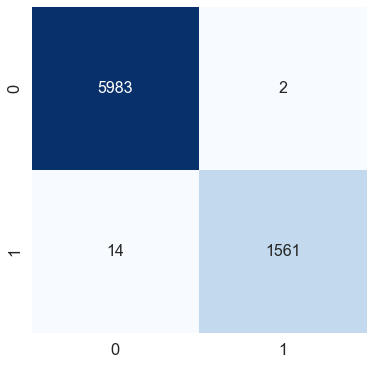

In [117]:
# confusion matrix
cm = confusion_matrix(y_test, lg.predict(x_test))

plt.figure(figsize=(6,6))
sns.set(font_scale=1.5) 
sns.heatmap(cm, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False);

f1_test = f1_score(y_test, lg.predict(x_test))
print(f'F1 Score: {f1_test}')